<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Missing Value Imputation</h1>
</div>

© Copyright Machine Learning Plus

__Imputation means you replace or fill the missing value with any guessed or estimated value__

While working on real world datasets, it's very common to have some missing values in the dataset. There are various reasons for it. It can be because some data gathering system was not working properly or it was because of some manual mistake. It's very important to impute the missing values before building the machine learning models, at least several of them. 

### Why should you impute the missing values?

Missing values present in the data, comes equipped with various problems. There are lot of issues with missing values. Some of those are
- Lot ML and Statistical algorithms are not designed in a way to treat the missing values by itself. So these algorithms will throw an error if you have missing values
- Missing values reduces the statistical power of the hypothesis tests
- Missing values can lead to bias in the data and you might now be able to predict/forecast correctly

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Representing Missing Values</h2>
</div>

The usual way of representing missing values in Python is `None`.

However there are multiple ways to represent missing data in NumPy and Pandas. 

NumPy provides `np.nan` for float and objects. 

Pandas provides pd.NA for generalise missing data and pd.NaT (not a time) for missing time data.

In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
# Numpy
np.nan

nan

In [3]:
# Pandas
pd.NA

<NA>

In [4]:
# Missing Time
pd.NaT

NaT

__Careful when using mising values for comparisons__

In [5]:
np.nan == np.nan

False

In [6]:
np.nan in [np.nan]

True

In [7]:
np.nan is np.nan

True

In [8]:
pd.NA == pd.NA

<NA>

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Types of missing values and causes of missing values</h2>
</div>

## 2.1. Types of missing values

### Missing completely at random(MCAR)

The probability of missing values in a variable is the same for all samples. For example, when a survey is conducted, and values were just randomly missed when being entered in the computer or a respondent chose not to respond to a question.

There is no effect of MCAR on inferences made by a model trained on such data

In [9]:
import pandas as pd
df = pd.read_csv('../Datasets/winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Missing at random(MAR)

The probability of missing values, at random, in a variable depends on the available information in other predictors. 

That is, when it is possible to predict the missing value based on other variable(s), we call it __missing at random (MAR)__.

For example, when men and women respond to the question “have you ever taken parental leave?”, men would tend to ignore the question at a different rate compared to women.

MARs may be handled by using the information in the other predictors to build a model and impute a value for the missing entry

### Missing not at random(MNAR)

The probability of missing values, not at random, depends on information that has not been recorded, and this information also predicts the missing values. 

For example, the revenue field contained missing values on a non-working day. It could be because there was no revenue on that day and could replaced with zero value.

Or if there were multiple versions of survey questions sent, and the recently added questions might have missing values in old surveys.

MNARs can be handled by studying the root cause of missing and replacing with an appropriate value. Generally there isn't much effect of MNAR on inferences made by a model trained on such data. But again, there can be few exceptions.


## 2.2. Causes of Missing Values
- Data might not be available for the complete time period of analysis
- Non-occurance of events
- People skipped response for some questions of the survey
- Non-applicability of questions in the survery
- Missing out at random

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Identify missing values</h2>
</div>

In [10]:
# import necessary libraries 
import numpy as np 
import pandas as pd

### Check and Select for Null Values

In [11]:
df = pd.read_csv("../Datasets/titanic_missing.csv")

In [12]:
df

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S
1,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.00,0,0,330958,7.8792,NaN,Q
2,821,822,1,3,"Lulic, Mr. Nikola",male,27.00,0,0,315098,8.6625,NaN,S
3,458,459,1,2,"Toomey, Miss. Ellen",female,50.00,0,0,F.C.C. 13531,10.5000,NaN,S
4,795,796,0,2,"Otter, Mr. Richard",male,39.00,0,0,28213,13.0000,NaN,S
5,118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
6,424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.00,1,1,370129,20.2125,NaN,S
7,678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.00,1,6,CA 2144,46.9000,NaN,S
8,269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S
9,229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,NaN,NaN,S


In [13]:
df.isnull().head(10)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,True,True,False


In [14]:
df.notnull().head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,False,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True


In [15]:
df['Age'].head()

0     2.0
1    19.0
2    27.0
3    50.0
4    39.0
Name: Age, dtype: float64

### Find share of missing values

In [16]:
df.isnull().sum()

index           0
PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             9
Age            15
SibSp           0
Parch           0
Ticket          0
Fare           10
Cabin          38
Embarked        0
dtype: int64

In [18]:
df.isnull().count()

index          50
PassengerId    50
Survived       50
Pclass         50
Name           50
Sex            50
Age            50
SibSp          50
Parch          50
Ticket         50
Fare           50
Cabin          50
Embarked       50
dtype: int64

In [24]:
df.isnull().mean()*100

index           0.0
PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex            18.0
Age            30.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare           20.0
Cabin          76.0
Embarked        0.0
dtype: float64

In [19]:
# missing data in column
total_count = df.isnull().sum(axis=0).sort_values(ascending=False)
percent_count = ((df.isnull().sum(axis=0)/df.isnull().count(axis=0))*100).sort_values(ascending=False)

In [25]:
total_count

Cabin          38
Age            15
Fare           10
Sex             9
index           0
PassengerId     0
Survived        0
Pclass          0
Name            0
SibSp           0
Parch           0
Ticket          0
Embarked        0
dtype: int64

In [26]:
percent_count = ((df.isnull().sum(axis=0)/df.isnull().count(axis=0))*100).sort_values(ascending=False)
percent_count

Cabin          76.0
Age            30.0
Fare           20.0
Sex            18.0
index           0.0
PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Embarked        0.0
dtype: float64

In [20]:
missing_data_columns = pd.concat([total_count, percent_count], axis=1, keys=['Total_count', 'Percent_count'])
missing_data_columns

,Total_count,Percent_count
Cabin,38,76.0
Age,15,30.0
Fare,10,20.0
Sex,9,18.0
index,0,0.0
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
SibSp,0,0.0


### Mini Challenge

Count the total number of missing values in each column of `df`

```python
import pandas as pd
import numpy as np

df = pd.read_csv('Datasets\Titanic.csv').sample(50, random_state=100)

n_missing = np.random.randint(4, 15, 1)

for i in range(n_missing):
    row = np.random.randint(1, df.shape[0])
    df.at[row, "Age"] = pd.NA

    
for i in range(n_missing):
    row = np.random.randint(1, df.shape[0])
    df.at[row, "Fare"] = pd.NA
    
for i in range(n_missing):
    row = np.random.randint(1, df.shape[0])
    df.at[row, "Sex"] = pd.NA
```

Code URL: https://git.io/JswTN

In [27]:
# Solution
import pandas as pd
import numpy as np

df = pd.read_csv('../Datasets/titanic.csv').sample(50, random_state=100)

In [28]:
n_missing = np.random.randint(4, 15, (1))[0]
print(n_missing)

for i in range(n_missing):
    row = np.random.randint(1, df.shape[0], (1))[0]
    df.at[row, "Age"] = pd.NA

for i in range(n_missing):
    row = np.random.randint(1, df.shape[0], (1))[0]
    df.at[row, "Fare"] = pd.NA
    
for i in range(n_missing):
    row = np.random.randint(1, df.shape[0], (1))[0]
    df.at[row, "Sex"] = pd.NA

4


In [29]:
df.isna().sum()

PassengerId    11
Survived       11
Pclass         11
Name           11
Sex            11
Age            20
SibSp          11
Parch          11
Ticket         11
Fare           12
Cabin          49
Embarked       11
dtype: int64

In [30]:
df.isna().sum().sum()

np.int64(180)

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Visualize missing values using Missingo</h2>
</div>

In [3]:
import missingno as msno # to visualize missing value
import pandas as pd

In [4]:
df = pd.read_csv("../Datasets/titanic_missing.csv")

<Axes: >

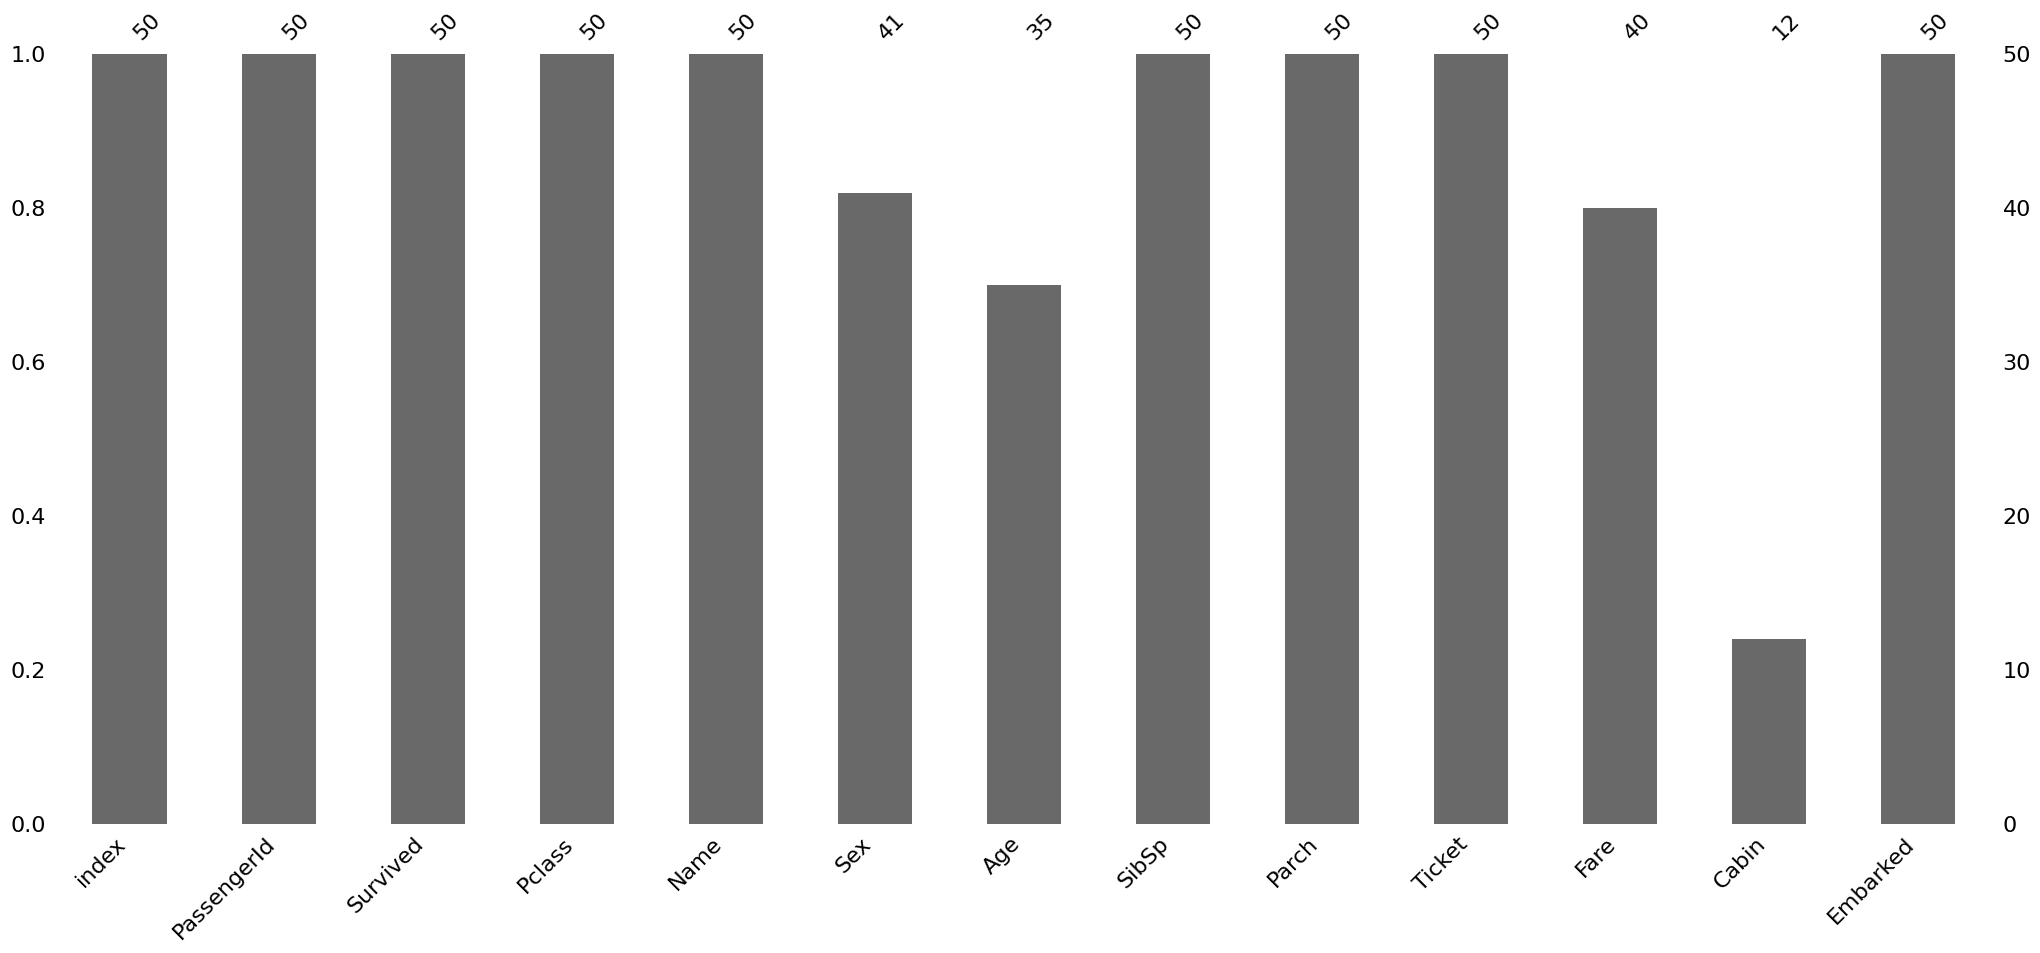

In [5]:
msno.bar(df)

The missingness matrix shows the missing values in the dataset. The sparkle line on the right shows how many of the columns in a given row is missing.

<Axes: >

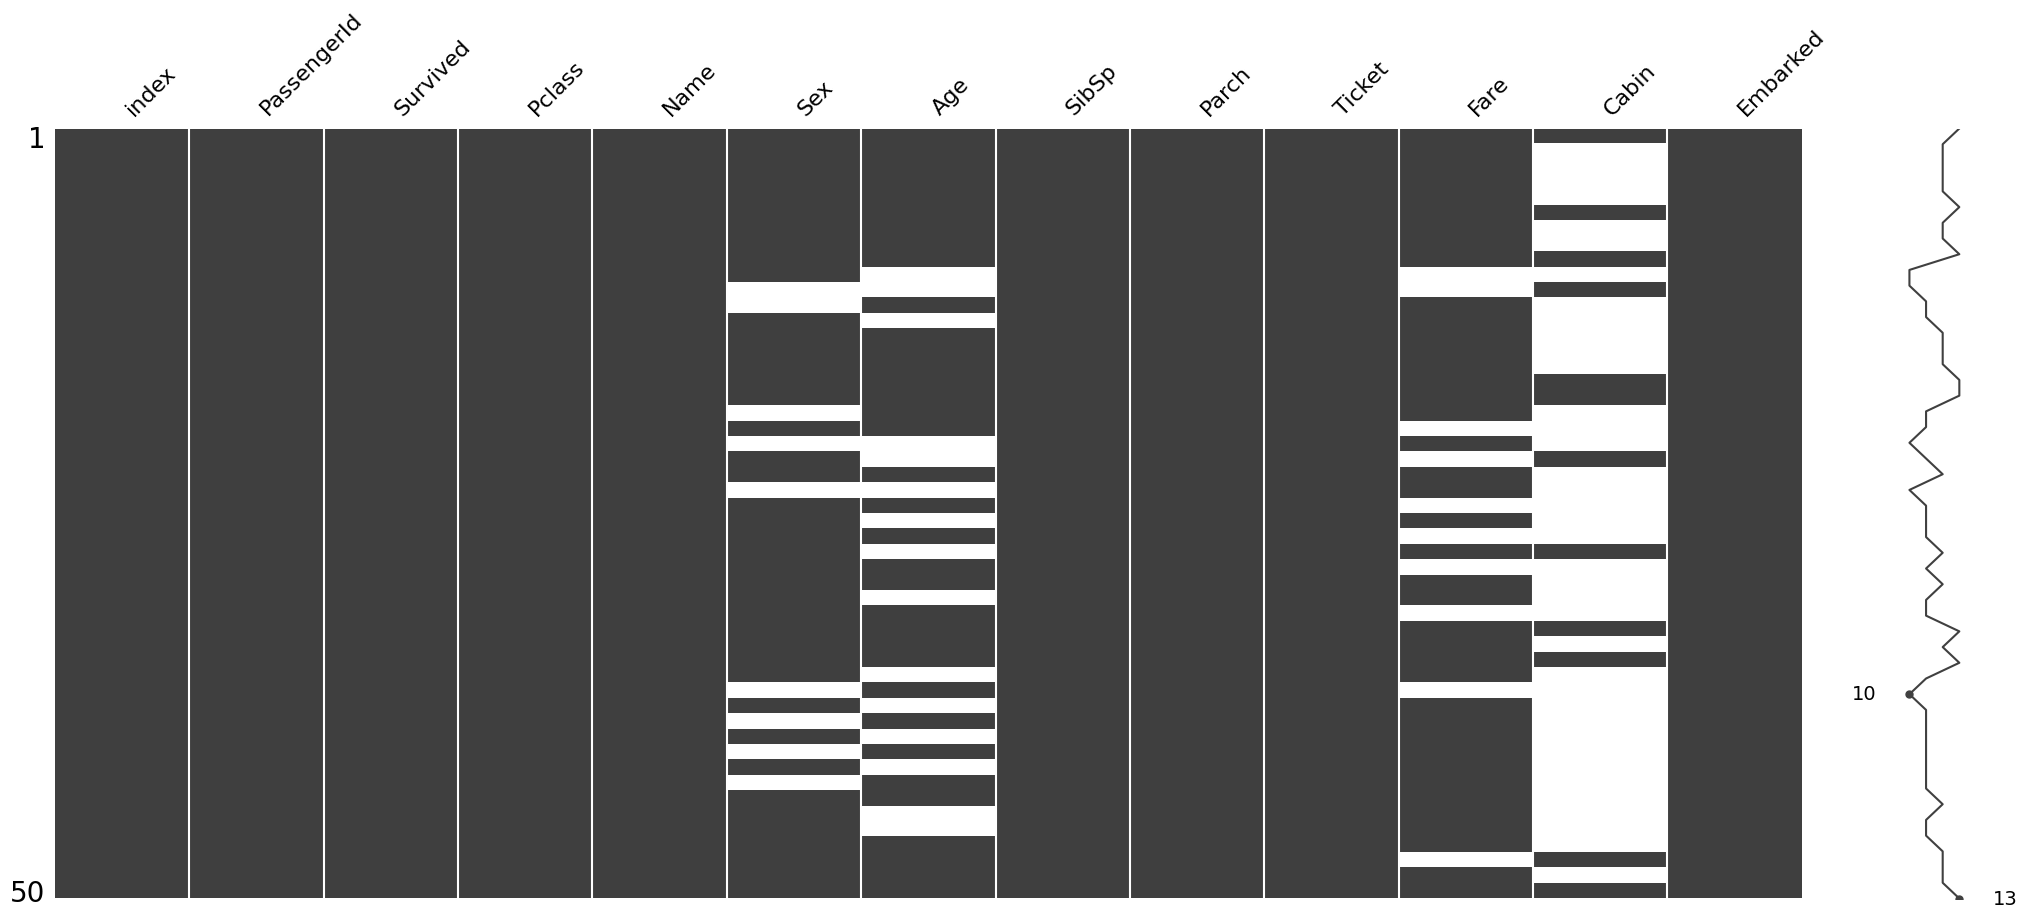

In [6]:
msno.matrix(df)

__Correlation of missing values amongst columns__: A high correlation would mean the missingness of values in one column is related to the missingness of values in another column.

<Axes: >

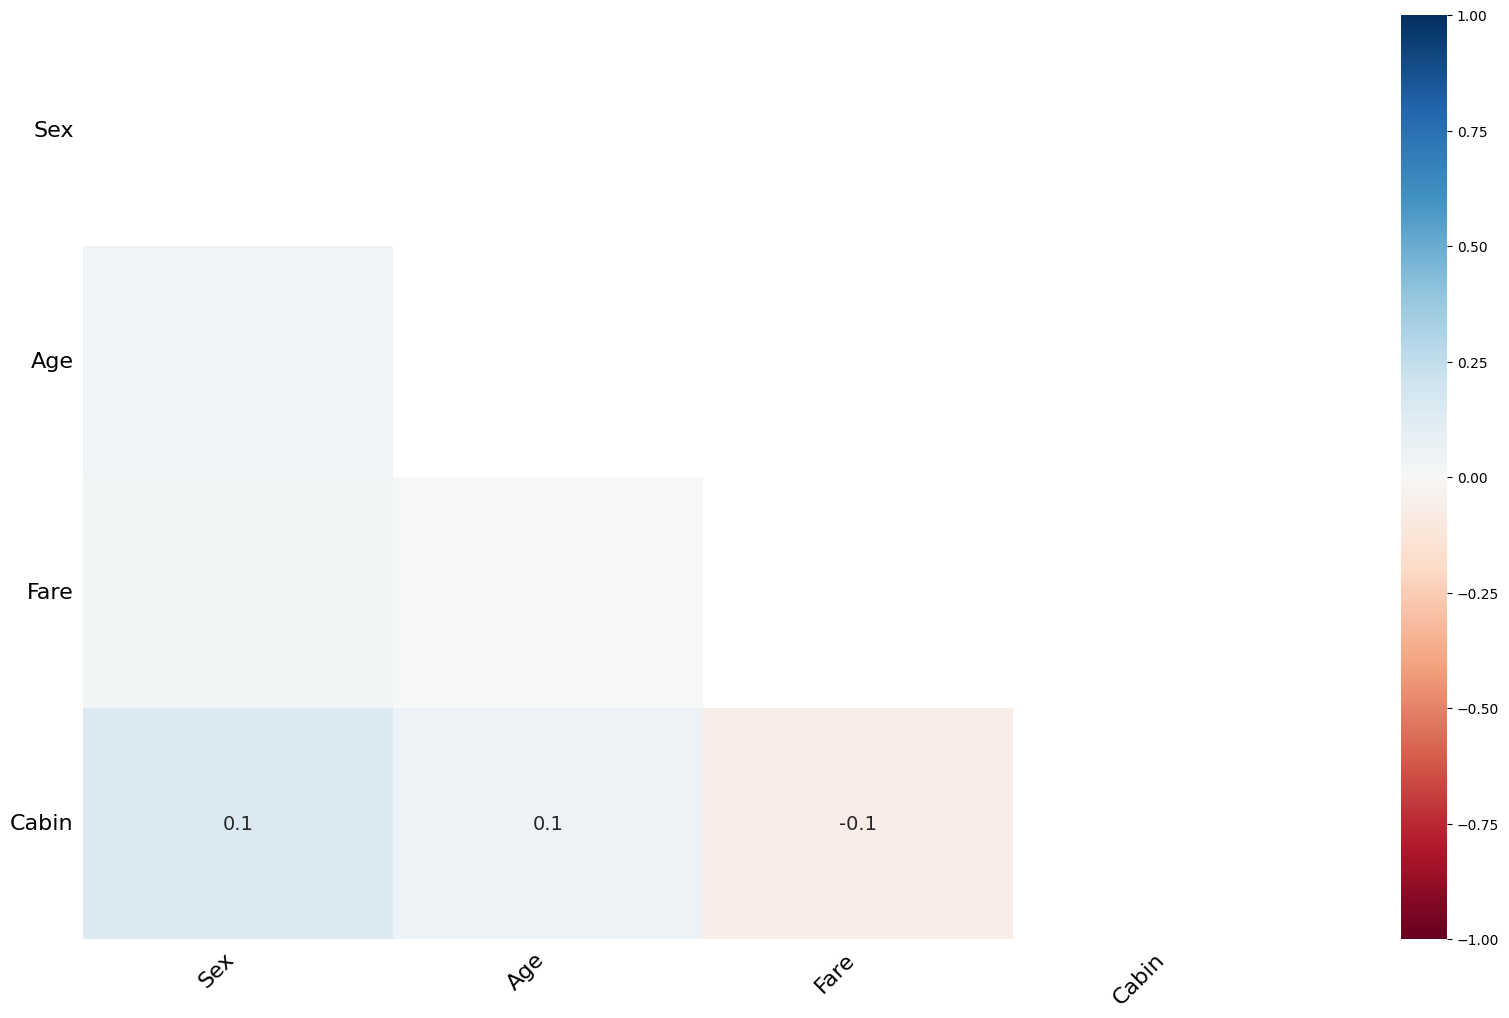

In [7]:
msno.heatmap(df)

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. When to drop features and when to drop rows</h2>
</div>

### Rows
If the proportion of rows with missing values is relatively small to the entire dataset, and you have a sufficiently large number of complete rows that fairly represents various cases, you can probably afford to drop the rows with missing values. 

It usually does not affect the performance of model much. But if the proportion is high (approx >5%) don't drop the rows as you might loose a heavy chunk of training data. 

### Features / Columns

If a feature has too many null values and imputing the data might give unrealistic values, dropping the feature might be a suitable option. 

But you need to be very cautious about it and try to understand what could be the reason behind null values. 

In case of classification problems where the class is imbalanced, these kind of features turn out to be very important. Before removing or imputing, you can also create a new feature stating if the value in a given feature was missing or not. It might serve as useful information for ML as well.

Ex. While dealing with the problem of credit card fraud detection, if the 'alternate contact number' feature contains missing values, it increases the chance that the account is not genuine.

__Drop rows that contain missing values in `Age`__

In [8]:
# Drop rows that contain missing values in Age
df[df['Age'].notnull()].head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
1,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
2,821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S
3,458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
4,795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S


Drop rows that contain missing values in `Age` or `Fare` 

In [9]:
df[(df['Age'].notnull()) | df['Fare'].notnull()]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S
1,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.00,0,0,330958,7.8792,NaN,Q
2,821,822,1,3,"Lulic, Mr. Nikola",male,27.00,0,0,315098,8.6625,NaN,S
3,458,459,1,2,"Toomey, Miss. Ellen",female,50.00,0,0,F.C.C. 13531,10.5000,NaN,S
4,795,796,0,2,"Otter, Mr. Richard",male,39.00,0,0,28213,13.0000,NaN,S
5,118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
6,424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.00,1,1,370129,20.2125,NaN,S
7,678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.00,1,6,CA 2144,46.9000,NaN,S
8,269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S
11,320,321,0,3,"Dennis, Mr. Samuel",NaN,22.00,0,0,A/5 21172,7.2500,NaN,S


<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Approaches to Filling Data</h2>
</div>

Depending on the context you can fill missing data with a standard, meaningful value.

Some common methods are, filling the missing with:
1. __Zero__ (Ex: if the 'Fare' data was missing, it could be possible that the person did not pay anything, in which case replacing with zero makes sense.)

2. __Most Frequent Observation__ : For Categorical data

3. __Standard String__ : For Categorical data

4. __Mean / Median__ of the entire data / appropriate group

5. __Interpolation__ on case basis. Ex: Sequence data with trend

6. __Forward Fill / Backward Fill__ for Sequential Data

7. __Predicting the missing values__

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("../Datasets/titanic_missing.csv")
df.head(20)

### 6.1. Fill with Zero

In [ ]:
# Fill all NA with 0
df.Fare.fillna(0)

### 6.2. Fill with the most frequent value

It may not be appropriate to fill categorical / string data with 0's. For categorical the common practice it to fill it up with the most frequent value (in the entire dataset or in a given group).

In [ ]:
# Fill with the most frequent value
df.Sex.value_counts()

In [ ]:
most_frequent = df.Sex.value_counts().index[0]
most_frequent

In [ ]:
df['Sex'].fillna(most_frequent).head(10)

### 6.3. Fill with a standard string

In [ ]:
df['Sex'] = df['Sex'].fillna("Empty")

In [ ]:
df

Alternately, a smarter way is to check the Salutation in the 'Name' column. If it is 'Mr', then 'male' else 'female'.

### 6.4. Fill with the Mean or the Median

- __If the data were missing completely at random__, then mean /median imputation might be suitable. You might also want to capture if the data was originally missing or not by creating a “missing indicator” variable. 

  Both methods are extremely straight forward to implement. 
   

- __If a variable is normally distributed__, the mean, median, and mode, are approximately the same. Therefore, replacing missing values by the mean and the median are almost equivalent. 

  Replacing missing data by the mode is not common practice for numerical variables.


-  __If the variable is skewed__, the mean is biased by the values at the far end of the distribution. 

   Therefore, the median is a better representation of the majority of the values in the variable.
   
Having said that, you should avoid filling with mean, if you observe and increasing or decreasing trend in your data, in which case you might want to consider 'interpolation' and predicting the missing value.

In [ ]:
# Mean value
mean_val = df['Fare'].mean()
df['Fare'].fillna(mean_val).head(10)

__Fill with the Mean or the Median by group__

In [ ]:
# Mean value by group
df['Fare_by_Class'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.mean())
df.head(15)

In [ ]:
df['Fare_imputed'] = np.where(np.isnan(df['Fare']), df['Fare_by_Class'], df['Fare'])
df.head(15)

### 6.5. Interpolation

Be careful with this technique, you should try to really understand whether or not this is a valid choice for your data. You should also know there are multiple interpolation methods available, the default is a linear method.

In [ ]:
fare = {'first_class':100, 'second_class':np.nan, 'third_class':60, 'open_class':20}

In [ ]:
ser = pd.Series(fare)

In [ ]:
ser

By default, `ser.interpolate()` will do a linear interpolation.

Linear interpolation will take the index (0,1,2..) as the X and the column you want to interpolate as Y and do the interpolation. So, you need to make sure the X is sorted in your data to make this work.

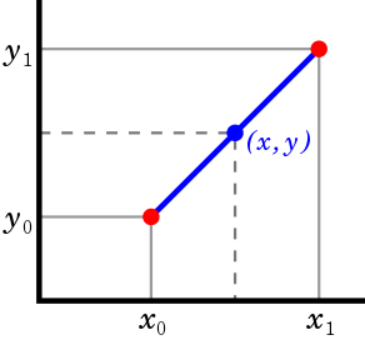

Source: Wikipedia

In [ ]:
ser.interpolate()

You could explore other methods as well, such as 'spline'.

In [ ]:
ser.reset_index().interpolate(method='spline', order=2)

What if you have a it as a Dataframe?

Works as well. But take care of the index.

In [ ]:
df = pd.DataFrame(ser,columns=['Fare'])

In [ ]:
df

In [ ]:
df.interpolate()

In [ ]:
df = df.reset_index()

In [ ]:

df

In [ ]:
df.interpolate(method='spline',order=2)

### Challenge

Impute the missing values in `Fare` column in dataframe df using linear interpolation.

```python
import pandas as pd
import numpy as np

df = pd.read_csv('../Datasets/titanic_missing.csv')
```

Link: https://bit.ly/3i0EA4z


In [ ]:
# Solution
import pandas as pd
import numpy as np

df = pd.read_csv('../Datasets/titanic_missing.csv')
df.head(15)

In [ ]:
# Linear
linear = df.loc[:, ['Pclass', 'Fare']].interpolate()
linear.head(15)

__Sort data s per Pclass and interpolate__

In [ ]:
# Linear
linear2 = df.loc[:, ['Pclass', 'Fare']].sort_values('Pclass').interpolate()
linear2[:20]

__Put them together and compare.__

In [ ]:
pd.concat([df.loc[:, ['Pclass', 'Fare']], linear, linear2], axis=1)

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>7. Iterative Imputer with MICE</h2>
</div>

You can also impute missing values by predicting it using other features from the dataset. 

The MICE or 'Multiple Imputations by Chained Equations', aka, 'Fully Conditional Specification' is a popular approach to do this. This is quite popular in the R programming language with the mice package. It is currently under experimental implemetation in Python via the `sklearn` package's `IterativeImputer`. `fancyimpute` is another nice package that implements this.

You basically take the variable that contains missing values as response 'Y' and other variables as predictors 'X'. Build a model with rows where Y is not missing, then predict the missing observations. This this multiple times by doing random draws of the data and take the mean of the predictions.

__The Method__

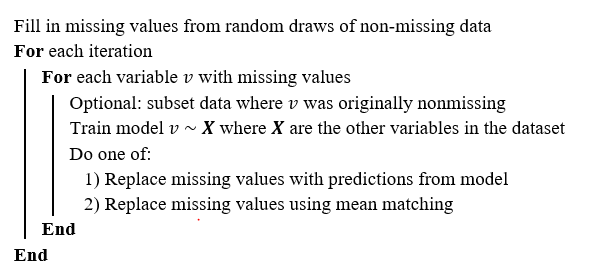

__Import Data__

In [10]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv("../Datasets/titanic_missing.csv")
df.head(15)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
1,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
2,821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S
3,458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
4,795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S
5,118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
6,424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S
7,678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S
8,269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S
9,229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,NaN,NaN,S


__Sklearn Iterative Imputer with MICE__

Multiple Imputation by Chained Equations, also called “fully conditional specification”.

In [13]:
# need to enable iterative imputer explicitly since its still experimental
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [14]:
# Define imputer
imputer = IterativeImputer(random_state=100)

In [15]:
# Use Numeric Features
# df_train = df.loc[:, ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]]
df_train = df.loc[:, ["Survived", "Pclass", "Fare"]]
df_train.head()

,Survived,Pclass,Fare
0,0,3,10.4625
1,1,3,7.8792
2,1,3,8.6625
3,1,2,10.5000
4,0,2,13.0000


In [16]:
df_train

,Survived,Pclass,Fare
0,0,3,10.4625
1,1,3,7.8792
2,1,3,8.6625
3,1,2,10.5000
4,0,2,13.0000
5,0,1,247.5208
6,0,3,20.2125
7,0,3,46.9000
8,1,1,135.6333
9,0,3,NaN


In [17]:
# fit on the dataset
imputer.fit(df_train)

IterativeImputer(random_state=100)

In [18]:
df_imputed = imputer.transform(df_train)
df_imputed[:10]

array([[  0.        ,   3.        ,  10.4625    ],
       [  1.        ,   3.        ,   7.8792    ],
       [  1.        ,   3.        ,   8.6625    ],
       [  1.        ,   2.        ,  10.5       ],
       [  0.        ,   2.        ,  13.        ],
       [  0.        ,   1.        , 247.5208    ],
       [  0.        ,   3.        ,  20.2125    ],
       [  0.        ,   3.        ,  46.9       ],
       [  1.        ,   1.        , 135.6333    ],
       [  0.        ,   3.        ,  17.78111695]])

In [19]:
# Replace with imputed values
df.loc[:, ["Survived", "Pclass", "Fare"]] = df_imputed
# df.loc[:, ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]] = df_imputed
df.head(20)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.462500,G6,S
1,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.00,0,0,330958,7.879200,NaN,Q
2,821,822,1,3,"Lulic, Mr. Nikola",male,27.00,0,0,315098,8.662500,NaN,S
3,458,459,1,2,"Toomey, Miss. Ellen",female,50.00,0,0,F.C.C. 13531,10.500000,NaN,S
4,795,796,0,2,"Otter, Mr. Richard",male,39.00,0,0,28213,13.000000,NaN,S
5,118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.520800,B58 B60,C
6,424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.00,1,1,370129,20.212500,NaN,S
7,678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.00,1,6,CA 2144,46.900000,NaN,S
8,269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.633300,C99,S
9,229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,17.781117,NaN,S


__Imputing String / Categorical__

In above example, the 'Sex' column is not imputed. We had excluded it because it contained string values. Let's encode it to numeric and then impute.

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [21]:
impute_col = 'Sex'
impute_col_encoded = "Sex_no"

In [22]:
le.fit(df.loc[:, impute_col])

LabelEncoder()

In [23]:
# Label mapping
dict(zip(le.classes_, le.transform(le.classes_)))

{'female': np.int64(0), 'male': np.int64(1), nan: np.int64(2)}

In [24]:
df[impute_col_encoded] = le.transform(df[impute_col])
df.head(15)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_no
0,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.462500,G6,S,0
1,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.879200,NaN,Q,0
2,821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.662500,NaN,S,1
3,458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.500000,NaN,S,0
4,795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.000000,NaN,S,1
5,118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.520800,B58 B60,C,1
6,424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.212500,NaN,S,1
7,678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.900000,NaN,S,0
8,269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.633300,C99,S,0
9,229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,17.781117,NaN,S,0


In [25]:
# Replace Cabin_no 12 with NaN
df[impute_col_encoded] = df[impute_col_encoded].map(lambda x: np.nan if x == 2 else x)

In [26]:
df.head(15)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_no
0,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.462500,G6,S,0.0
1,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.879200,NaN,Q,0.0
2,821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.662500,NaN,S,1.0
3,458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.500000,NaN,S,0.0
4,795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.000000,NaN,S,1.0
5,118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.520800,B58 B60,C,1.0
6,424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.212500,NaN,S,1.0
7,678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.900000,NaN,S,0.0
8,269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.633300,C99,S,0.0
9,229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,17.781117,NaN,S,0.0


In [27]:
df[impute_col_encoded].value_counts()

Sex_no
1.0    23
0.0    18
Name: count, dtype: int64

In [28]:
# Define imputer
imputer = IterativeImputer(random_state=100, )

In [29]:
df_train = df.loc[:, ["Survived", impute_col_encoded, "Fare"]]
df_train.head()

,Survived,Sex_no,Fare
0,0,0.0,10.4625
1,1,0.0,7.8792
2,1,1.0,8.6625
3,1,0.0,10.5000
4,0,1.0,13.0000


In [30]:
# fit on the dataset
imputer.fit(df_train)

IterativeImputer(random_state=100)

In [31]:
df_imputed = imputer.transform(df_train)
df_imputed[:10]

array([[  0.        ,   0.        ,  10.4625    ],
       [  1.        ,   0.        ,   7.8792    ],
       [  1.        ,   1.        ,   8.6625    ],
       [  1.        ,   0.        ,  10.5       ],
       [  0.        ,   1.        ,  13.        ],
       [  0.        ,   1.        , 247.5208    ],
       [  0.        ,   1.        ,  20.2125    ],
       [  0.        ,   0.        ,  46.9       ],
       [  1.        ,   0.        , 135.6333    ],
       [  0.        ,   0.        ,  17.78111695]])

In [32]:
# Replace with imputed values
df.loc[:, ["Survived", impute_col_encoded, "Fare"]] = df_imputed
df.head(15)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_no
0,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.462500,G6,S,0.000000
1,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.879200,NaN,Q,0.000000
2,821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.662500,NaN,S,1.000000
3,458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.500000,NaN,S,0.000000
4,795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.000000,NaN,S,1.000000
5,118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.520800,B58 B60,C,1.000000
6,424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.212500,NaN,S,1.000000
7,678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.900000,NaN,S,0.000000
8,269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.633300,C99,S,0.000000
9,229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,17.781117,NaN,S,0.000000


In [33]:
Sex_imputed = list(le.inverse_transform(df[impute_col_encoded].round().astype('int')))
Sex_imputed[:10]

['female',
 'female',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female']

In [34]:
df['Sex_imputed'] = Sex_imputed
df

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_no,Sex_imputed
0,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.462500,G6,S,0.000000,female
1,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.00,0,0,330958,7.879200,NaN,Q,0.000000,female
2,821,822,1,3,"Lulic, Mr. Nikola",male,27.00,0,0,315098,8.662500,NaN,S,1.000000,male
3,458,459,1,2,"Toomey, Miss. Ellen",female,50.00,0,0,F.C.C. 13531,10.500000,NaN,S,0.000000,female
4,795,796,0,2,"Otter, Mr. Richard",male,39.00,0,0,28213,13.000000,NaN,S,1.000000,male
5,118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.520800,B58 B60,C,1.000000,male
6,424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.00,1,1,370129,20.212500,NaN,S,1.000000,male
7,678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.00,1,6,CA 2144,46.900000,NaN,S,0.000000,female
8,269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.633300,C99,S,0.000000,female
9,229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,17.781117,NaN,S,0.000000,female


<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>7. How to validate the accuracy of your missing value treatment approach</h2>
</div>

In order to validate the accuracy of missing value imputation approach, remvove some values manually and impute those missing values. Post that compare the real values and missing values

### Prepare Data

In [35]:
df_original = pd.read_csv('../Datasets/titanic.csv')
df_original = df_original.dropna()

In [36]:
df_original.reset_index(inplace=True)
df_original.shape

(183, 13)

__Insert missing values randomly__, so as to be able to compare

Create 15 random indexes. We will replace these values with np.nan and later on impute these values. 

In [37]:
import random

In [38]:
# Create a random index 
random.seed(15)

k = 15
na_index = random.sample(range(df_original.shape[0]), k)
na_index

[53, 2, 133, 9, 40, 61, 4, 14, 174, 37, 177, 94, 29, 86, 119]

Replace the values corresponding to the index with np.nan

In [39]:
# Replace the values corresponding to the index with np.nan
df_missing = df_original.copy()

df_missing.loc[na_index, 'Age'] = np.nan
df_missing.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,NaN,0,0,17463,51.8625,E46,S
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,NaN,0,0,113783,26.5500,C103,S


Let's check the performance of imputations technique

#### Mean Imputation 

In [40]:
# Mean value
mean_val = df_missing['Age'].mean()
age_imputed = df_missing['Age'].fillna(mean_val)
age_imputed

0      38.000000
1      35.000000
2      35.187024
3       4.000000
4      35.187024
         ...    
178    47.000000
179    33.000000
180    56.000000
181    19.000000
182    26.000000
Name: Age, Length: 183, dtype: float64

In [41]:
original_value = df_original['Age'][na_index]
imputed_value = age_imputed[na_index]

Now, you can compute the error associated with this approach

In [42]:
# Compute the error
from sklearn.metrics import mean_squared_error

error = np.round(mean_squared_error(original_value, imputed_value), 2)
error

np.float64(340.67)

Let's plot the original and imputed values

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: title={'center': 'Imputed'}>

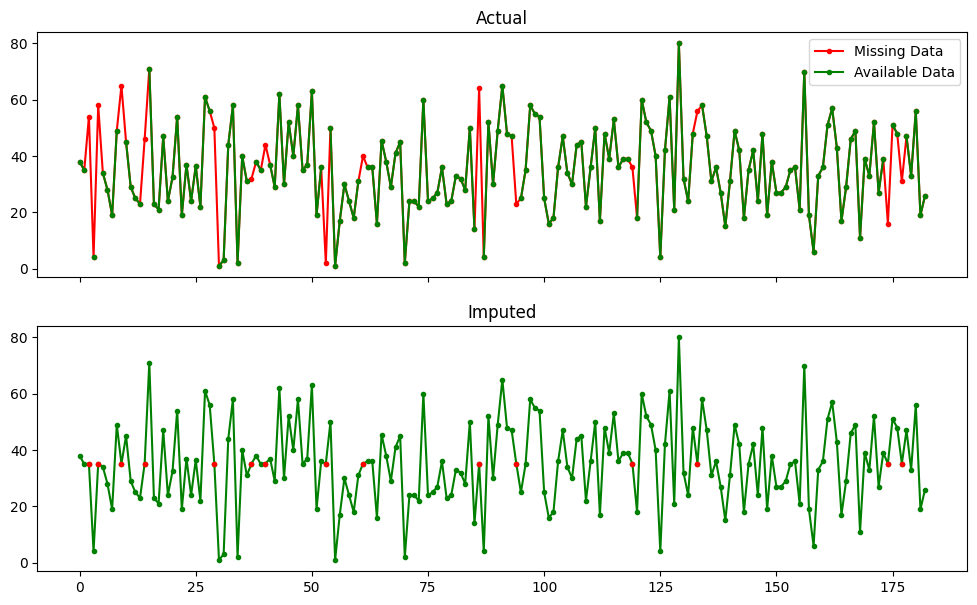

In [44]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12, 7))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_original['Age'].plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df_missing['Age'].plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Imputed -------------------------------
age_imputed.plot(title='Imputed', ax=axes[1], label='Actual', color='green', style=".-")
imputed_value.plot(title='Imputed', ax=axes[1], label='Actual', color='red', style=".")

## Mini Challenge

Replace missing values in 'Age' column using IterativeImputer (mice) and compare the actuals vs imputed using MSE and graph.

Code Link: https://git.io/JzHmh

In [48]:
import pandas as pd
import random

df_original = pd.read_csv('../Datasets/titanic.csv')
df_original = df_original.dropna()
df_original.reset_index(inplace=True)

# Introduce missing values
random.seed(15)

k = 15
na_index = random.sample(range(df_original.shape[0]), k)

# Replace the values corresponding to the index with np.nan
df_missing = df_original.copy()

df_missing.loc[na_index, 'Age'] = np.nan
df_missing.loc[na_index, 'Fare'] = np.nan
df_missing.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,NaN,0,0,17463,NaN,E46,S
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,NaN,0,0,113783,NaN,C103,S


In [49]:
df_missing.loc[:, ["Survived", "Pclass", "Fare", 'Age']].isna().sum()

Survived     0
Pclass       0
Fare        15
Age         15
dtype: int64

#### Solution

In [50]:
# need to enable iterative imputer explicitly since its still experimental
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Define imputer
imputer = IterativeImputer(random_state=100)

df_train = df_missing.loc[:, ["Survived", "Pclass", "Fare", 'Age']]
df_train.head()

# fit on the dataset
imputer.fit(df_train)
df_imputed = imputer.transform(df_train)
df_original.loc[:, ['Age_imputed']] = df_imputed[:, 3]
df_original.head(10)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imputed
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,42.462780
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,4.000000
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,35.035718
5,21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,34.000000
6,23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,28.000000
7,27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,19.000000
8,52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000
9,54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,42.462780


__MSE__

In [51]:
# Compute the mean squared error
from sklearn.metrics import mean_squared_error

error = np.round(mean_squared_error(df_original['Age'][na_index], df_original['Age_imputed'][na_index]), 2)
error

np.float64(290.18)

__Plot__

<Axes: title={'center': 'Imputed'}>

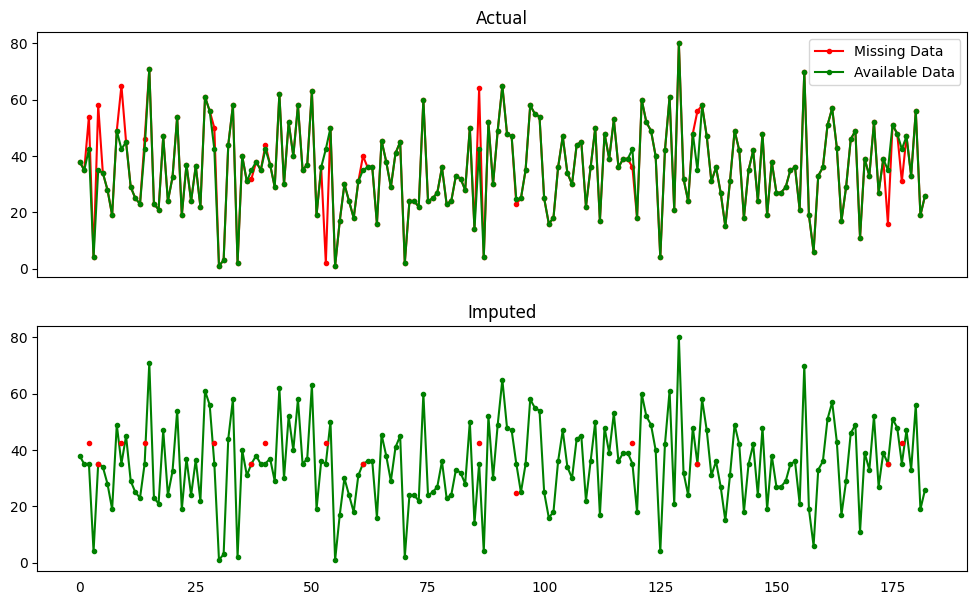

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12, 7))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_original['Age'].plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df_original['Age_imputed'].plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Imputed -------------------------------
age_imputed.plot(title='Imputed', ax=axes[1], label='Actual', color='green', style=".-")
df_original['Age_imputed'][na_index].plot(title='Imputed', ax=axes[1], label='Actual', color='red', style=".")